In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

SEED = 42
np.random.seed(SEED)

In [119]:
df = pd.read_csv (r'C:\Users\chee\Downloads\Walmart_Store_sales 2.csv')

In [120]:
df

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,14,23/12/2011,0,42.27,3.389,188.929975,8.523,3369068.99
1,2,23/12/2011,0,46.66,3.112,218.999550,7.441,3224369.80
2,27,24/12/2010,0,31.34,3.309,136.597273,8.021,3078162.08
3,4,25/11/2011,1,47.96,3.225,129.836400,5.143,3004702.33
4,10,25/11/2011,1,60.68,3.760,129.836400,7.874,2950198.64
...,...,...,...,...,...,...,...,...
6420,33,2/12/2011,0,59.12,3.701,129.845967,8.010,220060.35
6421,33,31/12/2010,1,52.91,3.148,127.087677,9.265,219804.85
6422,33,30/12/2011,1,51.60,3.428,130.071032,8.010,215359.21
6423,33,29/10/2010,0,71.34,3.130,126.436419,9.265,213538.32


In [121]:
df = df[['Unemployment', 'Weekly_Sales']]

In [122]:
X = df.iloc[:,0].values.reshape(-1,1) # input
y = df.iloc[:,1].values # output (dependent variable)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, shuffle=True, random_state=SEED)

In [124]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

In [93]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [94]:
pred = reg.predict(X_test)
pred_train = reg.predict(X_train)

In [95]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

In [96]:
lrResults = pd.DataFrame()
lrResults['Score'] = [trainScore,testScore]
lrResults['Step'] = ['train','test']

lrResults

,Score,Step
0,0.009997,train
1,0.013587,test


In [107]:
y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [98]:
compare_df

,Actual,Predicted
0,2042581.71,1.031840e+06
1,465408.72,1.036891e+06
2,311906.70,1.087639e+06
3,268929.03,1.081883e+06
4,2008344.92,1.098035e+06
...,...,...
638,2495630.51,1.011311e+06
639,1409515.73,1.086641e+06
640,911807.02,1.040445e+06
641,1417616.81,1.027200e+06


Simple Linear Regression:

Accuracy: 0.9996861186293393
Mean Absolute Error: 473492.39280498936
Mean Squared Error: 321396382798.0822
Root Mean Squared Error: 566918.3210993293


C:\Users\chee\anaconda3\envs\DeepLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

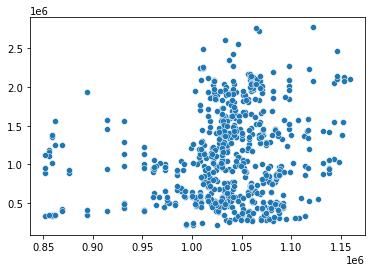

In [99]:
print('Simple Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test)

In [100]:
print("Regression model's training score = {:.6f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.6f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.009997
Regression model's test score     = 0.013587


In [101]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.6f}'.format(r2_score(y_test, y_pred)))

Coefficients: 
 [-29368.0887545]
Mean squared error: 321396382798.08
Coefficient of determination: 0.013587
